# **Taxi 🚕 Data** 📊
## Loading CSV file. 



In [68]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt


# Define the ZIP file name
zip_file_name = 'Yellow_Taxi_Assignment.csv.zip'

# Extract the ZIP file
with zipfile.ZipFile(zip_file_name, 'r') as zip_file:
    # Assuming there is only one CSV file in the ZIP archive
    csv_file_name = zip_file.namelist()[0]
    zip_file.extract(csv_file_name)

# Define the date columns that you want to parse as datetime objects
date_columns = ['tpep_pickup_datetime', 'tpep_dropoff_datetime']

# Read the extracted CSV file using pandas with date parsing
df_ny = pd.read_csv(csv_file_name, parse_dates=date_columns)

# Now we can work with the 'df' DataFrame containing the CSV data
# Checking the first few rows:
# Assuming you have a DataFrame named df_ny
##variable_types = df_ny.dtypes

# Now, variable_types is a Series that contains variable names as the index and their data types as values.
# You can print it or iterate over it to see the variable names and their types.
#for variable, data_type in variable_types.items():
#    print(f"Variable: {variable}, Data Type: {data_type}")
df_ny.info()
df_ny.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               304978 non-null  int64         
 1   tpep_pickup_datetime   304978 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  304978 non-null  datetime64[ns]
 3   passenger_count        295465 non-null  float64       
 4   trip_distance          304978 non-null  float64       
 5   RatecodeID             295465 non-null  float64       
 6   store_and_fwd_flag     295465 non-null  object        
 7   PULocationID           304978 non-null  int64         
 8   DOLocationID           304978 non-null  int64         
 9   payment_type           304978 non-null  int64         
 10  fare_amount            304978 non-null  float64       
 11  extra                  304978 non-null  float64       
 12  mta_tax                304978 non-null  floa

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,3.5,0.0,0.5,1.29,0.0,0.3,5.59,NaN,NaN
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,6.0,0.0,0.5,1.02,0.0,0.3,7.82,NaN,NaN
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,9.5,0.5,0.5,1.62,0.0,0.3,12.42,NaN,NaN
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,10.0,0.0,0.5,0.00,0.0,0.3,10.80,NaN,NaN
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,12.5,0.5,0.5,1.00,0.0,0.3,14.80,NaN,NaN


## Data Cleaning & Imputation

We can see from teh Data Frame info that there are 5 columns with null values.  

1.- **We will remove values from the following fields:**
| Field                | Count |
|----------------------|-------|
| passenger_count      | 9513  |
| RatecodeID           | 9513  |
| store_and_fwd_flag   | 9513  |

Because there can not be a Txi trip without passanger. 

In [69]:
# Remove rows with missing values in specific columns
columns_to_check = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag']
# Dropping the specific values
df_ny.dropna(subset=columns_to_check, inplace=True)
# The new number of rows
print(f"The number of rows is {df_ny.shape[0]}")


The number of rows is 295465


2.- **Nulls in columns `airport_fee` and `congestion_surcharge` will be developed differently.** Now that the rides with no passangers have been remove we will look into columns `airport_fee` and `congestion_surcharge` for cleaning or imputation. The unique values are:

In [70]:
unique_airport_fees = df_ny['airport_fee'].unique()
unique_congestion_surcharges = df_ny['congestion_surcharge'].unique()

print("Unique values in 'airport_fee':")
print(unique_airport_fees)

print("\nUnique values in 'congestion_surcharge':")
print(unique_congestion_surcharges)

Unique values in 'airport_fee':
[  nan  0.    1.25 -1.25]

Unique values in 'congestion_surcharge':
[  nan  0.    2.5  -2.5   2.75  0.5 ]




| `airport_fee` : $1.25 for pick up only at LaGuardia and John F. Kennedy Airports. | 
----
| **`congestion_surcharge` : Total amount collected in trip for NYS congestion surcharge.**| 


Following the definitions I will change the negative values to positive and replace the nan for 0. values.
when `airport_fee` is negative then multiply for -1. if `airport_fee` is nan remplace by 0. 


In [71]:
# First, fill NaN values in 'airport_fee' with 0
df_ny['airport_fee'].fillna(0, inplace=True)
df_ny['congestion_surcharge'].fillna(0, inplace=True)
# Then, replace negative values in 'airport_fee' with their absolute values
df_ny['airport_fee'] = df_ny['airport_fee'].apply(lambda x: abs(x) if x < 0 else x)
df_ny['congestion_surcharge'] = df_ny['congestion_surcharge'].apply(lambda x: abs(x) if x < 0 else x)

unique_airport_fees = df_ny['airport_fee'].unique()
unique_congestion_surcharges = df_ny['congestion_surcharge'].unique()

print("Unique values in 'airport_fee':")
print(unique_airport_fees)

print("\nUnique values in 'congestion_surcharge':")
print(unique_congestion_surcharges)

print(f"The number of rows is {df_ny.shape[0]}")

Unique values in 'airport_fee':
[0.   1.25]

Unique values in 'congestion_surcharge':
[0.   2.5  2.75 0.5 ]
The number of rows is 295465


Now all values are fitting the description in the data dictionary pdf. 

## Feature Engeneering  

Creating variable of trip duration in seconds because of its a granularity

In [72]:
df_ny["trip_duration_seconds"] = (df_ny["tpep_dropoff_datetime"] - df_ny["tpep_pickup_datetime"]).astype('timedelta64[s]')

In [73]:
#Creating flag with daytime 
df_ny['daytime_flag'] = (df_ny["tpep_pickup_datetime"].dt.hour > 5) & (df_ny["tpep_pickup_datetime"].dt.hour < 18)
df_ny['daytime_flag'] = pd.Categorical(df_ny['daytime_flag'])

In [74]:
# Creating Ctegorical Variable with day of the week. 
df_ny["pickup_weekday"] = df_ny["tpep_pickup_datetime"].dt.dayofweek
df_ny["pickup_weekday"] = pd.Categorical(df_ny["pickup_weekday"] )

In [75]:
df_ny["date_of_trip"] = df_ny["tpep_pickup_datetime"].dt.strftime('%d-%b-%y')

In [76]:
df_ny.info()

<class 'pandas.core.frame.DataFrame'>
Index: 295465 entries, 0 to 304977
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               295465 non-null  int64         
 1   tpep_pickup_datetime   295465 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  295465 non-null  datetime64[ns]
 3   passenger_count        295465 non-null  float64       
 4   trip_distance          295465 non-null  float64       
 5   RatecodeID             295465 non-null  float64       
 6   store_and_fwd_flag     295465 non-null  object        
 7   PULocationID           295465 non-null  int64         
 8   DOLocationID           295465 non-null  int64         
 9   payment_type           295465 non-null  int64         
 10  fare_amount            295465 non-null  float64       
 11  extra                  295465 non-null  float64       
 12  mta_tax                295465 non-null  float64  

## Descriptive Statistics. 
In this section I try to give a "Forsest" view of the data.
Location Data 

In [77]:
df_ny.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,trip_duration_seconds,daytime_flag,pickup_weekday,date_of_trip
0,2,2018-01-01 12:02:01,2018-01-01 12:04:05,1.0,0.53,1.0,N,142,163,1,...,1.29,0.0,0.3,5.59,0.0,0.0,0 days 00:02:04,True,0,01-Jan-18
1,2,2018-01-01 12:26:48,2018-01-01 12:31:29,1.0,1.05,1.0,N,140,236,1,...,1.02,0.0,0.3,7.82,0.0,0.0,0 days 00:04:41,True,0,01-Jan-18
2,2,2018-01-01 01:28:34,2018-01-01 01:39:38,4.0,1.83,1.0,N,211,158,1,...,1.62,0.0,0.3,12.42,0.0,0.0,0 days 00:11:04,False,0,01-Jan-18
3,1,2018-01-01 08:51:59,2018-01-01 09:01:45,1.0,2.30,1.0,N,249,4,2,...,0.00,0.0,0.3,10.80,0.0,0.0,0 days 00:09:46,True,0,01-Jan-18
4,2,2018-01-01 01:00:19,2018-01-01 01:14:16,1.0,3.06,1.0,N,186,142,1,...,1.00,0.0,0.3,14.80,0.0,0.0,0 days 00:13:57,False,0,01-Jan-18


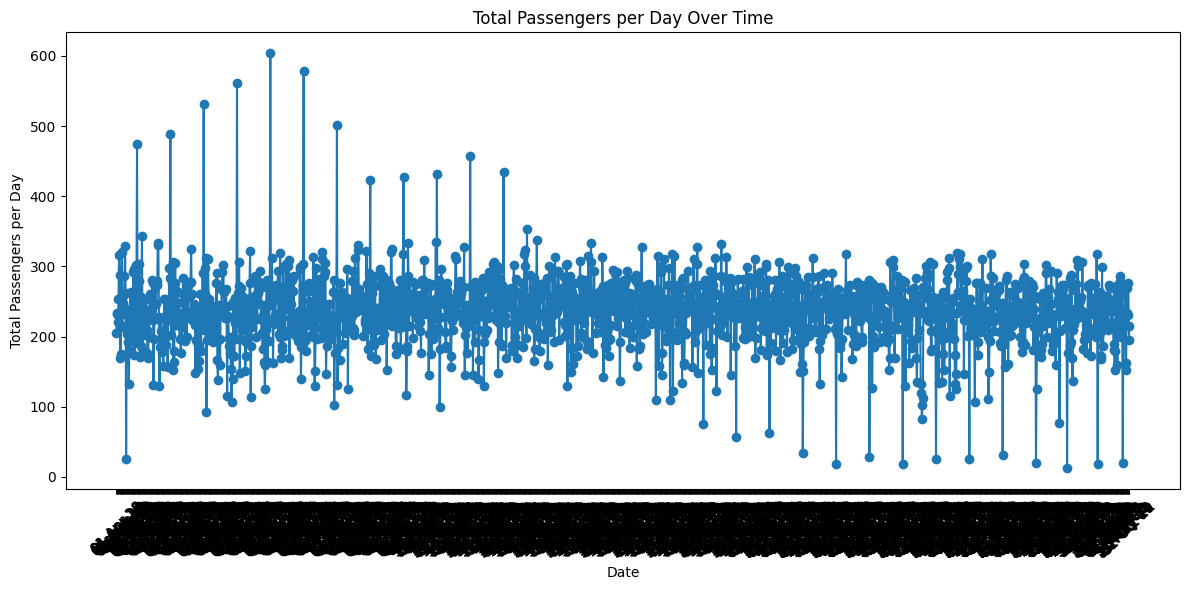

In [78]:
#Group by the formatted_pickup_date and sum the passenger_count
daily_passenger_count = df_ny.groupby('date_of_trip')['passenger_count'].sum().reset_index()
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the time series data
ax.plot(daily_passenger_count['date_of_trip'], daily_passenger_count['passenger_count'], marker='o', linestyle='-')

# Set labels and title
ax.set_xlabel('Date')
ax.set_ylabel('Total Passengers per Day')
ax.set_title('Total Passengers per Day Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### References and Resources:
*Many features were extracted from Chat GPT or the following repository in github*:
https://github.com/norberte/DS_professional_development/blob/master/DS%20interviews/NYC%20Yellow%20Taxi.ipynb